# Lab Assignment: Implement Neural Network for XOR gate from scratch 


First we will set up our enviroment. We will need `pandas` and `numpy` packages for data processing and `matplotlib` to visualize the performance of the NN later on.

In [1]:
# XOR table
import pandas as pd, numpy as np, matplotlib.pyplot as plt
XOR_table = pd.read_csv('XOR_table.csv')
XOR_table

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


This XOR table will be our input to train the model. Specifically, our inputs are the `x1` and `x2` columns and the `y` column are the labels, or desired outputs. We will extract the values from the XOR table into an array and split out inputs and outputs.

![](https://drive.google.com/uc?export=view&id=1lf82hKZxfBqhV2m5cLIRO_9pO1S3T4ty)

In [2]:
XOR_values = XOR_table.values
X = XOR_values[:,0:2]
targets = XOR_values[:,-1].reshape(-1,1)

print(X)       # Input data
print(targets) # Output targets

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0]
 [1]
 [1]
 [0]]


Now let's implement our Neural Network. It will have one input layer, a hidden layer, and an output layer. The input and hidden layers will each have two nodes, and the output will have one, since our task is to output a binary value. 

Here we will do some setup.

In [54]:
# First set a seed for consistent results
np.random.seed(5)

# Define dimensions on input, hidden and output layers
# There are two input neurons, two in hidden layer, and one output
input_dim, hidden_dim, output_dim = 2,2,1

# Define learning rate
learning_rate=0.1

# Define a hidden layer and output layer
# We will initialize our weights randomly
W1 = np.random.normal(0,1,(hidden_dim, input_dim))
W2 = np.random.normal(0,1,(hidden_dim, output_dim))

Now let's define some functions.

In [40]:
# Define sigmoid activation function
# if deriv = True, returns the derivative instead
def sigmoid(x, deriv=False):
  if deriv:
    return x*(1-x)
  else:
    return 1/(1+np.exp(-x))

# Define loss function
# Accepts two arrays and return the L2-norm error
def loss(y,t):
  return np.sum((y-t)**2)

# Performs feed foward computations and returns the results
def forward(x, w1, w2):
  z = sigmoid(np.dot(x,w1.T))
  y = sigmoid(np.dot(z,w2))
  return z,y

# Performs back propogation to obtain gradients of loss function
def backprop(x,z,y,w1,w2,targets):
  error = 2*(y-targets)
  grad_w2 = np.dot((error*sigmoid(y, deriv=True)).T, z).T
  g1 = error*sigmoid(y,deriv=True).dot(W2.T)
  g2 = g1*sigmoid(z,deriv=True)
  grad_w1 = np.dot(g2.T, x)
  return grad_w1, grad_w2

# Training routine
# returns 
#   w1,w2: updated weights matrices
#   loss_vals: array of loss function values for each iteration
def train(x,targets,w1,w2,iter = 10000,verbose=False):
  # Define empty array to store loss function output
  loss_vals = []

  # create local copies of W1 and W2 so we don't overwrite the originals
  local_w1 = w1.copy()
  local_w2 = w2.copy()
  for i in range(iter):
    
    # Forward pass: compute predicted y
    z,y = forward(x, local_w1, local_w2)

    # Compute and print L2-norm loss
    if verbose: print(loss(y,targets))

    # Backprop to compute gradients of w1 and w2 with respect to L2-norm loss
    grad_w1, grad_w2 = backprop(x,z,y,local_w1,local_w2,targets)

    # Update weights
    local_w1 -= learning_rate*grad_w1
    local_w2 -= learning_rate*grad_w2

    # Save loss to an array
    loss_vals.append(np.sum(loss(y,targets)))

  return local_w1,local_w2,loss_vals

# Predict based on trained weights
def predict(x, w1_pred, w2_pred):
  z,y = forward(x,w1_pred,w2_pred)
  return z,y

Now with these functions defined we may implement the NN. 

Text(0, 0.5, 'Loss')

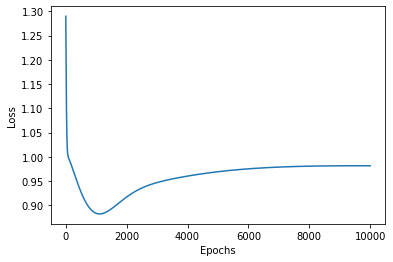

In [55]:
# Train neural net
W1_pred,W2_pred,loss_vals = train(X,targets,W1,W2)

# Plot loss function over each iteration
%matplotlib inline
plt.plot(loss_vals);
plt.xlabel("Epochs")
plt.ylabel("Loss")

Although it does converge, we observe a high amount of error from this loss curve. Let's try adding more neurons, say 4, to our hidden layer and see if this reduces our error.

Text(0, 0.5, 'Loss')

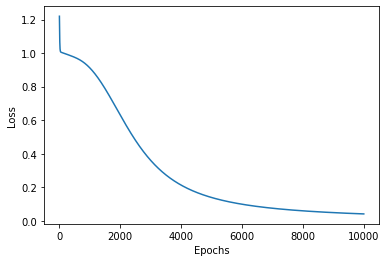

In [56]:
# Redefine hidden_dim
hidden_dim = 4

# Reinitialize weights
np.random.seed(5)
W1 = np.random.normal(0,1,(hidden_dim, input_dim))
W2 = np.random.normal(0,1,(hidden_dim, output_dim))

# Train neural net
W1_pred,W2_pred,loss_vals = train(X,targets,W1,W2)

# Plot loss function over each iteration
%matplotlib inline
plt.plot(loss_vals);
plt.xlabel("Epochs")
plt.ylabel("Loss")

Now our loss function converges very close to 0. 
Checking our predictions on the training data, we should see values that are relatively close to the actual labels.

In [57]:
# run prediction on test data
z,y = predict(X, W1_pred, W2_pred)
results = np.hstack((X,y, targets))
vars = np.array(["X1", "X2", "predicted", "actual"])
pd.DataFrame(results, columns = vars)

,X1,X2,predicted,actual
0,0.0,0.0,0.071611,0.0
1,0.0,1.0,0.887923,1.0
2,1.0,0.0,0.893812,1.0
3,1.0,1.0,0.110417,0.0


Now we would like to evaluate the model performance on a test dataset. Since we trained the model on the entire XOR table, let's try testing on a finer grid of cartesian coordinates between `[0,1]`. We can then plot the results and use a color scale to represent the predictions. Although we do not have labels to formally determine model accuracy, we know that, for example, that if we take a point near `[1,1]`, say `x=[0.9, 0.9]`, that the model should predict a value close to `0`, because these data points are similar in terms of distance. By this intuition, we can use a colormap as a metric for model performance.

In [50]:
# Define a mesh grid
n=100
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
xv, yv = np.meshgrid(x, y)

# reshape into model input
x1 = xv.reshape(n**2,1)
x2 = yv.reshape(n**2,1)
x_test = np.hstack((x1,x2))

# Test model
z,y = predict(x_test, W1_pred, W2_pred)

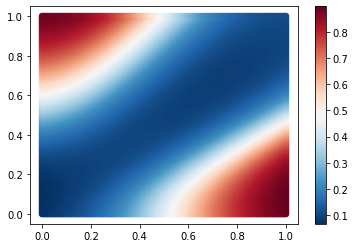

In [51]:
# Plot results
results = np.hstack((x_test,y))
plt.scatter(results[:,0], results[:,1], c=results[:,2], cmap = "RdBu_r");
plt.colorbar();

Here we have plotted the results of our trained neural network applied to the test data. We see in regions near `[0,1]` and `[1,0]`, the color is a gradient of dark to light red, which indicates a prediction close to `1` as expected. Similarly near `[0,0]` and `[1,1]` and in the digaonal between we see a gradient of dark to light blue, which indicates a prediction close to `0`. These colors define the two classes our inputs are classified into by the model. We can think of the classification boundary then as where color changes between red and blue. Indeed, we see that there are some regions colored in white, which draw a clear boundary between red and blue regions, so it is here that we can plausibly define the decision boundaries. When we observe two decision boundaries, this also confirms that the XOR gate is not a linearly separable problem. 

To explore further, we can observe how these boundaries change by adding more neurons to the hidden layer and training again on the XOR table. Recall that this model has `4` neurons in its hidden layer, so perhaps adding more will result in a more well defined, linear decision boundaries.

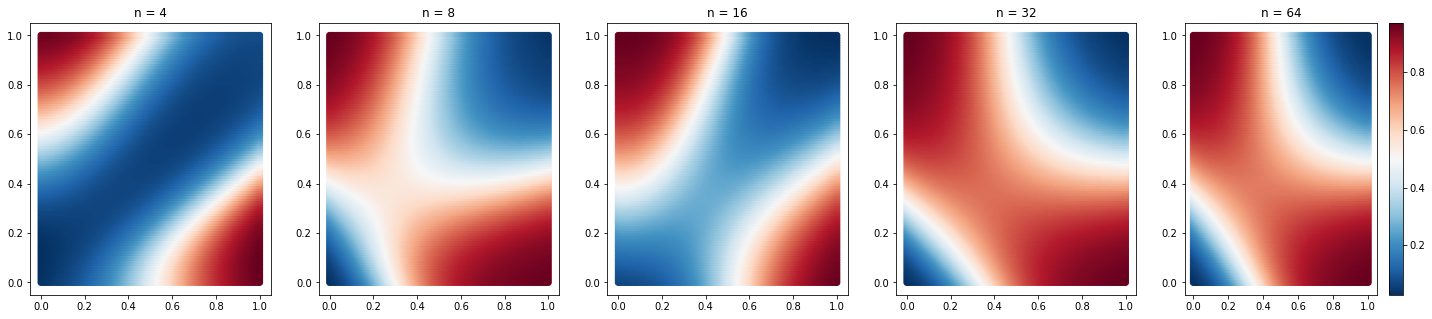

In [47]:
dims = [4,8,16,32,64]
fig = plt.figure(figsize=(25,5)) # create figure 2

# train model with varying hidden layer neurons
for i in np.arange(5):
  np.random.seed(5)
  hidden_dim = dims[i]
  W1 = np.random.normal(0,1,(hidden_dim, input_dim))
  W2 = np.random.normal(0,1,(hidden_dim, output_dim))

  # Train neural net
  W1_pred,W2_pred,loss_vals = train(X,targets,W1,W2)

  # Test model
  z,y = predict(x_test, W1_pred, W2_pred)

  # plot results
  results = np.hstack((x_test,y))
  plt.subplot(1,5,(i+1))
  plt.scatter(results[:,0], results[:,1], c=results[:,2], cmap = "RdBu_r");
  plt.title(f'n = {dims[i]}')

plt.colorbar();



Here we plot the colormaps of our predictions, training the neural network with an increasing number of hidden layer neurons. Each trial does not seem to converge to a specific pair of decision boundaries when increasing the number of neurons. Interestingly, we observe two different yet equally valid sets of decision boundaries that separate the points `[0,0],[1,1]` and `[0,1],[1,0]`.